Anh-Nguyet Lise Nguyen

# Problem 1

## Problem 1.2

In [1]:
import numpy as np
import pandas as pd 
import sklearn.linear_model as skllm
import scipy.stats 
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("data/ozone_train.csv")
X_train = df_train.loc[:, df_train.columns != "FFVC"]
y_train = df_train.loc[:, "FFVC"]


In [3]:
df_test = pd.read_csv("data/ozone_test.csv")
X_test = df_test.loc[:, df_test.columns != "FFVC"]
y_test = df_test.loc[:, "FFVC"]


In [4]:
# Problem 1.2

def summary_OLS(X, y, feature_names):
    array_1D = None
    
    if len(np.shape(X)) == 1:
        array_1D = True
        X = X.reshape(-1,1)
        
    OLS = skllm.LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = OLS.predict(X) 
    coefficients = np.append(OLS.intercept_, OLS.coef_)
    
    
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y - y_pred)**2))/(len(newX)-len(newX[0]))

    var = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
    std = np.sqrt(var)
    ts_b = coefficients/ std

    p = np.zeros(len(ts_b))
    for index, i in enumerate(ts_b):
        p[index] = 2*(1-scipy.stats.t.cdf(np.abs(i),(len(newX)-1))) 
        
    if array_1D:
        summary = pd.DataFrame(zip(coefficients, std, p), columns=["Feature", "Standard deviance", "p-values"]
                              , index=(["intercept"] + [feature_names]))
        
    else:
        summary = pd.DataFrame(zip(coefficients, std, p), columns=["Coefficients", "Standard deviance", "p-values"],
                          index=(["intercept"] + list(feature_names)))
                           
    return summary
        


In [5]:
summary_train = summary_OLS(X_train, y_train, X_train.columns.values)

summary_test = summary_OLS(X_test, y_test, X_test.columns.values)

summary_train

,Coefficients,Standard deviance,p-values
intercept,0.000000,0.067556,1.000000e+00
ADHEU,-0.075544,0.207669,7.163388e-01
HOCHOZON,-0.177523,0.114152,1.211935e-01
AMATOP,-0.035130,0.102232,7.314208e-01
AVATOP,-0.072781,0.108710,5.038038e-01
ADEKZ,0.023488,0.102991,8.197875e-01
ARAUCH,-0.051278,0.095157,5.904580e-01
FSNIGHT,0.006259,0.159481,9.687241e-01
FMILB,-0.180463,0.167958,2.836679e-01
FTIER,-0.161323,0.166531,3.336307e-01


## Problem 1.3 

I'm choosing to use criterias for p-value in backward elimination and forward selection.

### Backward elimination

In [6]:
# Problem 1.3

def backward_elimination(X, y, alpha):
    # Make copies of X and y
    X_copy = X.copy()
    y_copy = y.copy()
    
    feature_names = X_copy.columns.values
    # Calculating coefficients, standard deviations and p-values as summary
    # of initial X and y 
    summary = summary_OLS(X_copy, y_copy, feature_names)
    p_values = summary.loc[:, "p-values"]

    # Find maximum p-value
    p_max = np.max(p_values)
    
    # Iterate until p <= alpha
    while p_max > alpha:
        # Calculating coefficients, standard deviations and p-values using summary_OLS function
        feature_names = X_copy.columns.values
        summary = summary_OLS(X_copy, y_copy, feature_names)
        summary.drop("intercept", axis=0, inplace=True)
        p_values = summary.loc[:, "p-values"]
        
        # Locating index with maximum p-value and 
        # dropping corresponding feature
        p_max_index = p_values.idxmax(axis=1)
        X_copy.drop(p_max_index, axis=1, inplace=True)
        
        # Update maximum p-value
        p_max = p_values.loc[p_max_index]        
    feature_names = X_copy.columns.values
    
    return X_copy, summary_OLS(X_copy, y_copy, feature_names)



In [75]:
X_backelim_1, summary_backelim_1 = backward_elimination(X_train, y_train, 1e-1)
print("Backward elimination using threshold 0.1 \n\n", summary_backelim_1)

Backward elimination using threshold 0.1 

            Coefficients  Standard deviance      p-values
intercept      0.000000           0.028405  1.000000e+00
FTIER         -0.314379           0.140045  2.566413e-02
FSPFEI         0.532646           0.197145  7.374622e-03
MALE           0.259259           0.043282  7.370458e-09
FEMALE        -0.244138           0.042503  2.707817e-08
FLGROSS        0.569397           0.056343  0.000000e+00
FLGEW          0.191533           0.055953  7.245137e-04


In [79]:
X_backelim_2, summary_backelim_2 = backward_elimination(X_train, y_train, 1e-3)
summary_backelim_2

print("Backward elimination using threshold 0.001 \n\n", summary_backelim_2)

Backward elimination using threshold 0.001 

            Coefficients  Standard deviance      p-values
intercept      0.000000           0.027781  1.000000e+00
MALE           0.247276           0.044284  6.184383e-08
FEMALE        -0.243319           0.044069  8.505661e-08
FLGROSS        0.691443           0.041935  0.000000e+00


### Forward selection

In [9]:
def forward_selection(X, y, alpha):
    X_copy = X.copy()
    y_copy = y.copy()
    p_max = alpha - 1
    p_min = 0
    feature_include = []
    feature_names = np.array(list(X_copy.columns.values))
    while p_max < alpha and len(feature_names)>0:

        n_features = len(feature_names)
        p_values = np.zeros(n_features)
        
        for i, feature in enumerate(feature_names):
                    
            features = np.append(feature_include, feature_names[i])

            X_feature = X_copy.loc[:, features].values
            summary = summary_OLS(X_feature, y_copy, features)

            summary.drop((["intercept"] + feature_include ), axis=0, inplace=True)
            
            
            p_one = summary.loc[:, "p-values"].values
            p_values[i] = p_one
        
        p_min_index = np.argmin(p_values)
        p_min = p_values[p_min_index]

        feature_min_p = feature_names[p_min_index]
        feature_include.append(feature_min_p)
        feature_names = feature_names[feature_names != feature_min_p]

        
        X_feature = X_copy.loc[:, features].values

        summary_ = summary_OLS(X_feature, y_copy, feature_include)
        
        p_max = summary.loc[:, "p-values"].values.max()

        X_final = X_copy.loc[:, feature_include]
        
    return X_final, summary_OLS(X_final, y_copy, feature_include)


In [69]:
X_forsec_1, summary_forsec_1 = forward_selection(X_train, y_train, 1e-1)
print("Forward selection using threshold 0.1\n \n",summary_forsec_1)

Forward selection using threshold 0.1
 
            Coefficients  Standard deviance  p-values
intercept      0.000000           0.059760  1.000000
FLGROSS        0.574629           0.059205  0.000000
FLGEW          0.187214           0.058849  0.001654
MALE           0.255861           0.085246  0.002962


In [80]:
X_forsec_2, summary_forsec_2 = forward_selection(X_train, y_train, 1e-3)
print(f"Forward selection using threshold 0.001\n \n",summary_forsec_2)

Forward selection using threshold 0.001
 
            Coefficients  Standard deviance  p-values
intercept      0.000000           0.043678  1.000000
FLGROSS        0.598139           0.060691  0.000000
FLGEW          0.174029           0.060691  0.004495


It is interesting to note that using the same criteria $\alpha$ for p-value in both backward elimination and forward selection, for $\alpha=0.1$ the number of variables in the model is higher for backward elimination (6) than forward selection (3). For $\alpha=0.001$ the backward selection model contains three variables, while the forward selection contains two variables. The variable FLGROSS is included in every model and seems to be the most significant. Looking at the low p-values of the remaining variables of the new models, I think it is likely that these models will perform better than the full models, as eliminating the other variables with higher p-values is like eliminating noise. 

## Problem 1.4


In [40]:
def bootstrap(y, n_iter=1000):
    N = len(y)
    N_train = int(0.8*N)
    N_test = int(0.2*N)
    
    all_indices = np.arange(N)
    
    indices_bootstrapped = []
    for i in range(n_iter):
        indices_train = np.random.choice(all_indices, size=N_train, replace=True)
        indices_test = np.random.choice(all_indices, size=N_test, replace=True)
        
        indices_bootstrapped.append([indices_train, indices_test])
        
    return indices_bootstrapped
    
    

In [87]:
shrinkage_param = np.logspace(-3, -1, 1000)

# Lasso with 5-fold cross validation 
reg_lasso_cv = skllm.LassoCV(alphas=shrinkage_param, cv=5, n_jobs=-1, fit_intercept=False).fit(X_train, y_train)
# calculate mean square error for the test on each fold, 
# then take the mean over all folds axis=1
MSE_lasso_cv = np.mean(reg_lasso_cv.mse_path_, axis=1)


In [88]:
a = bootstrap(y_train, n_iter=100)
reg_lasso_bootstrap = skllm.LassoCV(alphas=shrinkage_param, cv=a, n_jobs=-1, fit_intercept=False).fit(X_train, y_train)
MSE_lasso_bootstrap = np.mean(reg_lasso_bootstrap.mse_path_, axis=1)

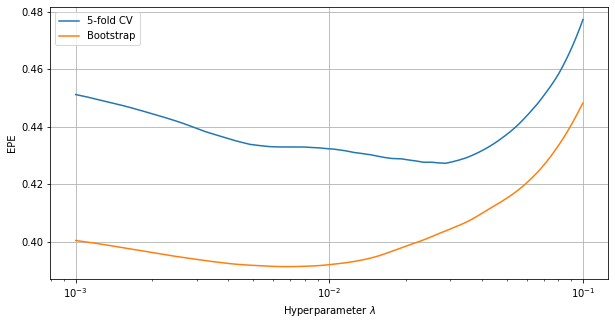

In [89]:
figure_lasso = plt.figure(figsize=(10,5))
plt.semilogx(shrinkage_param, MSE_lasso_cv[::-1], label="5-fold CV")
plt.semilogx(shrinkage_param, MSE_lasso_bootstrap[::-1], label="Bootstrap")
plt.xlabel(r"Hyperparameter $\lambda$")
plt.ylabel("EPE")
plt.legend()
plt.grid()
plt.show()



In [90]:
print(f"The best shrinkage parameter for Lasso using CV is {reg_lasso_cv.alpha_:.2e} "+ 
      f"with R2 score of {reg_lasso_cv.score(X_test,y_test):.2f}")


print(f"The best shrinkage parameter for Lasso using bootstrap is {reg_lasso_bootstrap.alpha_:.2e} "+ 
      f"with R2 score of {reg_lasso_bootstrap.score(X_test,y_test):.2f}")

The best shrinkage parameter for Lasso using CV is 2.84e-02 with R2 score of 0.65
The best shrinkage parameter for Lasso using bootstrap is 6.77e-03 with R2 score of 0.67


From the plot, the EPE found using bootstrap is noticably lower than the EPE found using 5-fold cross validation. This is due to the severe underestimation of the EPE by the bootstrapping method, as the training and test sets are not independent. This can be improved by using e.g. 0.632 bootstrap.

## Problem 1.5